# WeatherPy
----
## Insights and conclusions

1. We can see a **strong negative correlation** between latitude and temperature, explaining only for northern hemisphere, the greater the latitude, the lesser temperature will be. In the other hand, we see a **positive correlation** for southern hemisphere were we can explain, the greater the latitude, the greater the temperature.


2. Referring to the other variables Humidity, Cloudiness and Wind Speed, **the data does not show any correlation** between these variables and the latitude of the city.


3. We can also infer that according to the Latitude vs Wind Speed scatter plot, we can see that the greatest outliers of windspeed belong to the northern hemisphere, but there is no correlation with the latitude.


In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import pprint
from scipy.stats import linregress
import scipy.stats as st

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
latitudes=[]
longitudes=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        latitudes.append(lat_lng[0])
        longitudes.append(lat_lng[1])
        
print(len(cities))
# cities=cities[:20]
# pd.DataFrame(lat_lngs)


614


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_df=[]

index=1
counter=1
print('Beginning Data Retrieval     ')
print('-----------------------------')

for city in cities:

    url=f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}&units=imperial'
    response=requests.get(url).json()

    if index>50: 
        counter+=1
        index=0
        
    try:
        city_name=response["name"]
        index+=1
        
        city_df.append({'City':response["name"],
             'Lat':response['coord']['lat'],
             'Lng':response['coord']['lon'],
             'Max Temp':response['main']['temp_max'],
             'Humidity': response['main']['humidity'],
             'Cloudiness':response['clouds']['all'],
             'Wind Speed':response['wind']['speed'],
              'Country':response['sys']['country'],
              'Date':response['dt']})
        
        print(f'Processing Record {index} of Set {counter} | {city_name} ')
        
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    
    
print('-----------------------------')
print('Data Retrieval Complete      ')
print('-----------------------------')


Beginning Data Retrieval     
-----------------------------
City not found. Skipping...
Processing Record 2 of Set 1 | Mokhsogollokh 
Processing Record 3 of Set 1 | Busselton 
Processing Record 4 of Set 1 | San Policarpo 
Processing Record 5 of Set 1 | Ushuaia 
Processing Record 6 of Set 1 | Rikitea 
Processing Record 7 of Set 1 | Punta Arenas 
Processing Record 8 of Set 1 | Hermanus 
City not found. Skipping...
Processing Record 9 of Set 1 | Lucapa 
Processing Record 10 of Set 1 | Saint-Philippe 
Processing Record 11 of Set 1 | Hobart 
Processing Record 12 of Set 1 | Atuona 
Processing Record 13 of Set 1 | Butaritari 
Processing Record 14 of Set 1 | Mount Gambier 
Processing Record 15 of Set 1 | Padang 
Processing Record 16 of Set 1 | Naryan-Mar 
Processing Record 17 of Set 1 | Jamestown 
Processing Record 18 of Set 1 | Upernavik 
Processing Record 19 of Set 1 | New Norfolk 
Processing Record 20 of Set 1 | Portland 
Processing Record 21 of Set 1 | Flin Flon 
Processing Record 22 of Se

Processing Record 32 of Set 4 | Nicolás R Casillas 
Processing Record 33 of Set 4 | Mwense 
Processing Record 34 of Set 4 | Tomatlán 
Processing Record 35 of Set 4 | Troitskiy 
Processing Record 36 of Set 4 | Udachny 
Processing Record 37 of Set 4 | Jiwani 
Processing Record 38 of Set 4 | Shimoda 
Processing Record 39 of Set 4 | Airai 
Processing Record 40 of Set 4 | Boa Vista 
Processing Record 41 of Set 4 | Oistins 
Processing Record 42 of Set 4 | Forsytheganj 
Processing Record 43 of Set 4 | Fort Nelson 
Processing Record 44 of Set 4 | Pisco 
Processing Record 45 of Set 4 | Bowmore 
Processing Record 46 of Set 4 | Nuevo Comalapa 
Processing Record 47 of Set 4 | Ermelo 
Processing Record 48 of Set 4 | Lebanon 
Processing Record 49 of Set 4 | Nizhniy Tsasuchey 
Processing Record 50 of Set 4 | Thabazimbi 
Processing Record 51 of Set 4 | Farafangana 
Processing Record 1 of Set 5 | Nizwá 
Processing Record 2 of Set 5 | Nanortalik 
City not found. Skipping...
Processing Record 3 of Set 5 

Processing Record 13 of Set 8 | Moyobamba 
Processing Record 14 of Set 8 | Fairbanks 
Processing Record 15 of Set 8 | Humboldt 
Processing Record 16 of Set 8 | Teahupoo 
Processing Record 17 of Set 8 | Kuala Terengganu 
Processing Record 18 of Set 8 | Zambezi 
Processing Record 19 of Set 8 | Nioro 
Processing Record 20 of Set 8 | Impfondo 
Processing Record 21 of Set 8 | Vostok 
Processing Record 22 of Set 8 | Tuatapere 
Processing Record 23 of Set 8 | El Salvador 
Processing Record 24 of Set 8 | Mabaruma 
Processing Record 25 of Set 8 | Altamira 
City not found. Skipping...
Processing Record 26 of Set 8 | Nhulunbuy 
Processing Record 27 of Set 8 | Shaunavon 
Processing Record 28 of Set 8 | Dudinka 
Processing Record 29 of Set 8 | Lichtenburg 
Processing Record 30 of Set 8 | San Andrés 
Processing Record 31 of Set 8 | Qasigiannguit 
Processing Record 32 of Set 8 | Progreso 
Processing Record 33 of Set 8 | Nemuro 
Processing Record 34 of Set 8 | Saint George 
Processing Record 35 of Set

Processing Record 39 of Set 11 | Sultepec 
Processing Record 40 of Set 11 | Nikel 
Processing Record 41 of Set 11 | Dhārchula 
Processing Record 42 of Set 11 | Sterling 
Processing Record 43 of Set 11 | Vandœuvre-lès-Nancy 
Processing Record 44 of Set 11 | Broken Hill 
Processing Record 45 of Set 11 | Maragogi 
Processing Record 46 of Set 11 | San Luis 
Processing Record 47 of Set 11 | Nara 
Processing Record 48 of Set 11 | Camopi 
Processing Record 49 of Set 11 | Aleksandro-Nevskiy 
Processing Record 50 of Set 11 | Najrān 
Processing Record 51 of Set 11 | Örebro 
Processing Record 1 of Set 12 | Kidal 
Processing Record 2 of Set 12 | Aksarka 
Processing Record 3 of Set 12 | Lorengau 
Processing Record 4 of Set 12 | Mehnagar 
Processing Record 5 of Set 12 | São Gabriel da Cachoeira 
Processing Record 6 of Set 12 | Perth 
Processing Record 7 of Set 12 | Vilhena 
-----------------------------
Data Retrieval Complete      
-----------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_df=pd.DataFrame(city_df)

city_df.to_csv('../Resources/City Data.csv')
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mokhsogollokh,61.4681,128.9203,28.94,97,100,3.53,RU,1619732188
1,Busselton,-33.6500,115.3333,48.99,98,72,9.10,AU,1619732189
2,San Policarpo,12.1791,125.5072,76.48,84,73,2.48,PH,1619732189
3,Ushuaia,-54.8000,-68.3000,42.80,56,20,3.44,AR,1619731981
4,Rikitea,-23.1203,-134.9692,76.37,68,99,8.75,PF,1619732190


In [6]:
city_df.describe().round(2)

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,567.00,567.00,567.00,567.00,567.00,567.00,5.670000e+02
mean,20.29,22.81,61.00,71.60,54.10,7.49,1.619732e+09
std,33.65,89.82,19.02,22.01,37.99,5.09,9.366000e+01
min,-54.80,-179.17,-1.93,7.00,0.00,0.31,1.619732e+09
25%,-6.14,-56.86,46.40,61.00,18.00,3.51,1.619732e+09
50%,24.69,27.85,63.82,77.00,65.00,6.31,1.619732e+09
75%,48.83,103.95,77.00,88.00,90.00,10.29,1.619732e+09
max,78.22,177.48,100.99,100.00,100.00,29.93,1.619732e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#  Get the indices of cities that have humidity over 100%.
over_humidity = city_df[city_df['Humidity']>100].index
over_humidity

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data=city_df.drop(over_humidity , inplace=False)
clean_city_data.head().round(2)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mokhsogollokh,61.47,128.92,28.94,97,100,3.53,RU,1619732188
1,Busselton,-33.65,115.33,48.99,98,72,9.10,AU,1619732189
2,San Policarpo,12.18,125.51,76.48,84,73,2.48,PH,1619732189
3,Ushuaia,-54.80,-68.30,42.80,56,20,3.44,AR,1619731981
4,Rikitea,-23.12,-134.97,76.37,68,99,8.75,PF,1619732190


In [9]:
clean_city_data[['Lat','Max Temp']] = np.int64(clean_city_data[['Lat','Max Temp']])
# clean_city_data.dtypes

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

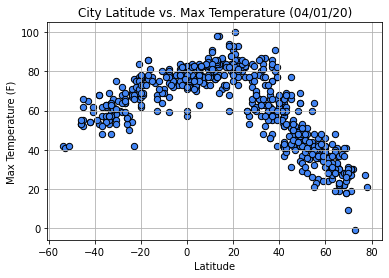

In [10]:
clean_city_data.plot.scatter(x="Lat", y="Max Temp", s=40,color= '#4285F4' , edgecolors = "black")

# Format and labels
plt.title("City Latitude vs. Max Temperature (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Graphs/LatVsTemp.png")
plt.show()

## Latitude vs. Humidity Plot

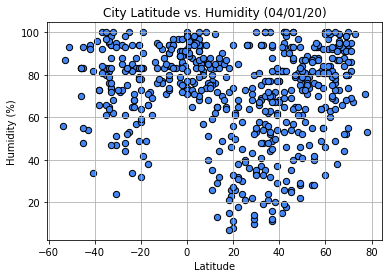

In [11]:
clean_city_data.plot.scatter(x="Lat", y="Humidity", s=40,color= '#4285F4' , edgecolors = "black")

# Format and labels
plt.title("City Latitude vs. Humidity (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Graphs/LatVsHum.png")
plt.show()

## Latitude vs. Cloudiness Plot

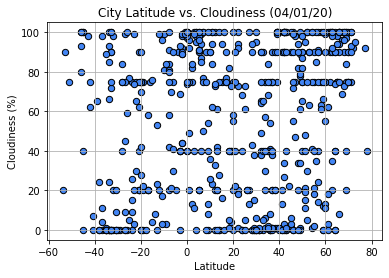

In [12]:
clean_city_data.plot.scatter(x="Lat", y="Cloudiness", s=40,color= '#4285F4' , edgecolors = "black")

# Format and labels
plt.title("City Latitude vs. Cloudiness (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Graphs/LatVsCloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

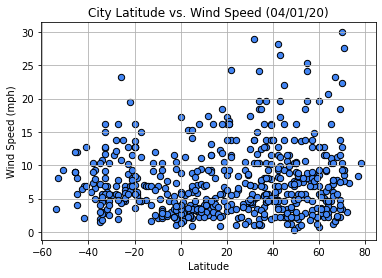

In [13]:
clean_city_data.plot.scatter(x="Lat", y="Wind Speed", s=40,color= '#4285F4' , edgecolors = "black")

# Format and labels
plt.title("City Latitude vs. Wind Speed (04/01/20)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid (b=True, which="major",axis="both",linestyle="-")  
plt.savefig("Graphs/LatVsWind.png")
plt.show()

## Linear Regression

In [14]:
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] > 0]
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is -0.88
The r-value is: 0.7723119259772745


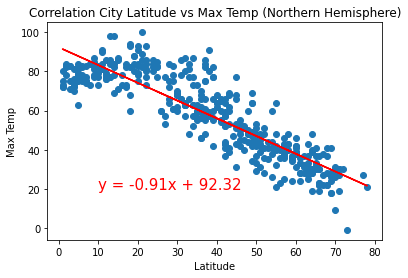

<Figure size 432x288 with 0 Axes>

In [34]:
# Linear regression model and correlation coefficient 

x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Max Temp"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))


plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(10,20),fontsize=15,color="red")
plt.title("Correlation City Latitude vs Max Temp (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Graphs/CorrelationNorth(LatVsTemp).png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The correlation coefficient is 0.78
The r-value is: 0.6014951233438482


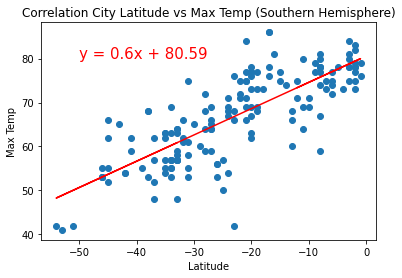

<Figure size 432x288 with 0 Axes>

In [33]:
# Linear regression model and correlation coefficient 

x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Max Temp"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,80),fontsize=15,color="red")
plt.title("Correlation City Latitude vs Max Temp (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.show()

plt.savefig("Graphs/CorrelationSouth(LatVsTemp).png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.13
The r-value is: 0.01632314698791107


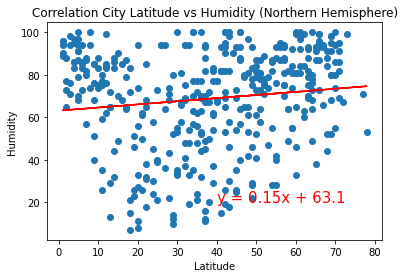

<Figure size 432x288 with 0 Axes>

In [32]:
# Linear regression model and correlation coefficient 

x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Humidity"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,20),fontsize=15,color="red")
plt.title("Correlation City Latitude vs Humidity (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("Graphs/CorrelationNorth(LatVsHumidity).png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The correlation coefficient is 0.17
The r-value is: 0.02822203388587102


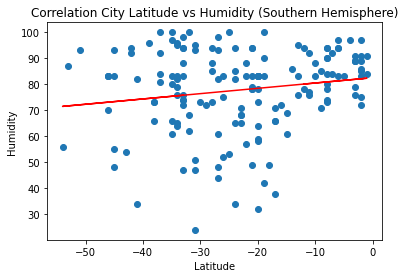

<Figure size 432x288 with 0 Axes>

In [31]:
# Linear regression model and correlation coefficient 

x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Humidity"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,10),fontsize=15,color="red")
plt.title("Correlation City Latitude vs Humidity (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.show()

plt.savefig("Graphs/CorrelationSouth(LatVsHumidity).png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.15
The r-value is: 0.02187840314880427


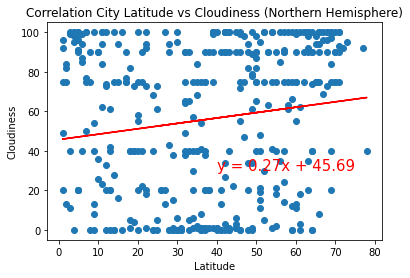

<Figure size 432x288 with 0 Axes>

In [35]:
# Linear regression model and correlation coefficient 

x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Cloudiness"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,30),fontsize=15,color="red")
plt.title("Correlation City Latitude vs Cloudiness (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig("Graphs/CorrelationNorth(LatVsCloud).png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The correlation coefficient is 0.14
The r-value is: 0.019718369441471307


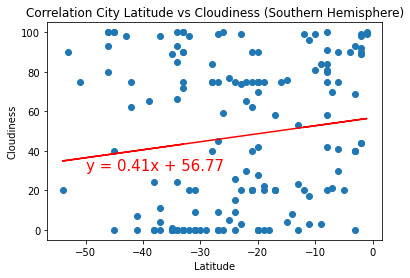

<Figure size 432x288 with 0 Axes>

In [36]:
# Linear regression model and correlation coefficient 

x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Cloudiness"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,30),fontsize=15,color="red")
plt.title("Correlation City Latitude vs Cloudiness (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.show()

plt.savefig("Graphs/CorrelationSouth(LatVsCloud).png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is 0.12
The r-value is: 0.015325333432538515


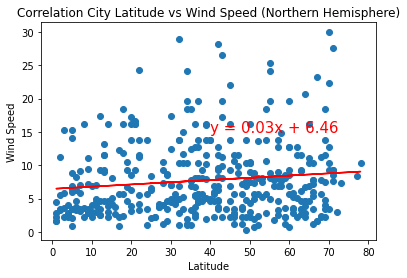

<Figure size 432x288 with 0 Axes>

In [42]:
# Linear regression model and correlation coefficient 

x_axis = northern_hemisphere["Lat"]
y_axis = northern_hemisphere["Wind Speed"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(40,15),fontsize=15,color="red")
plt.title("Correlation City Latitude vs Wind Speed (Northern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.savefig("Graphs/CorrelationNorth(LatVsWind).png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The correlation coefficient is -0.21
The r-value is: 0.044424321762544995


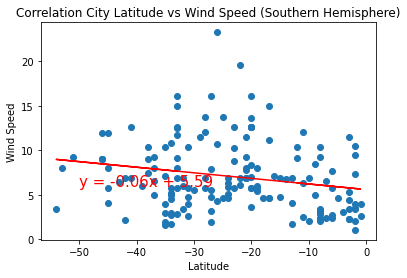

<Figure size 432x288 with 0 Axes>

In [43]:
# Linear regression model and correlation coefficient 

x_axis = southern_hemisphere["Lat"]
y_axis = southern_hemisphere["Wind Speed"]

corr=round(st.pearsonr(x_axis,y_axis)[0],2)

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept

print(f"The correlation coefficient is {corr}")
print(f"The r-value is: {rvalue**2}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis,y_axis)
plt.plot(x_axis,regress_values,"r-")
plt.annotate(line_eq,(-50,6),fontsize=15,color="red")
plt.title("Correlation City Latitude vs Wind Speed (Southern Hemisphere)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.show()

plt.savefig("Graphs/CorrelationSouth(LatVsWind).png")

In [39]:
clean_city_data.to_csv('../Resources/Clean City Data.csv')

In [40]:
clean_city_data

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Mokhsogollokh,61,128.9203,28,97,100,3.53,RU,1619732188
1,Busselton,-33,115.3333,48,98,72,9.10,AU,1619732189
2,San Policarpo,12,125.5072,76,84,73,2.48,PH,1619732189
3,Ushuaia,-54,-68.3000,42,56,20,3.44,AR,1619731981
4,Rikitea,-23,-134.9692,76,68,99,8.75,PF,1619732190
...,...,...,...,...,...,...,...,...,...
562,Lorengau,-2,147.2712,82,75,44,3.96,PG,1619732434
563,Mehnagar,25,83.1167,85,21,0,6.55,IN,1619732434
564,São Gabriel da Cachoeira,0,-67.0892,72,98,100,1.30,BR,1619732435
565,Perth,-31,115.8333,61,93,20,5.75,AU,1619732148
